## LPA 社区发现

In [1]:
import networkx as nx
import io
import zipfile
import urllib.request
from networkx.algorithms import community
import matplotlib.pyplot as plt

In [2]:
# 数据加载
url = 'http://www-personal.umich.edu/~mejn/netdata/football.zip'

sock = urllib.request.urlopen(url) # 打开链接
s = io.BytesIO(sock.read()) # 读取文件数据
sock.close()

zf = zipfile.ZipFile(s)
# 查看zip文件中的文件和目录列表
file_list = zf.namelist()
print(file_list)  # 打印出文件列表以查看正确的相对路径

['football.gml', 'football.txt']


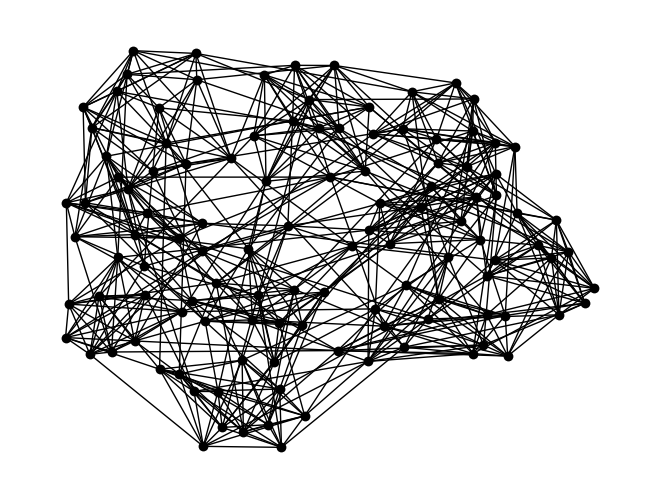

In [3]:
txt = zf.read('football.txt').decode()
gml = zf.read('football.gml').decode()

gml = gml.split('\n')[1:]
G = nx.parse_gml(gml)

# print(txt)
# for n, d in G.degree():
#   print(f'{n:20} {d:2}')

# options = {'node_color': 'black', 'node_size': 50, 'linewidths': 0, 'width': 1, 'with_labels': True}
options = {'node_color': 'black', 'node_size': 50, 'linewidths': 0, 'width': 1}

pos = nx.spring_layout(G, seed=2024)
nx.draw(G, pos, **options)
plt.show()

In [4]:
commnuities = list(community.label_propagation_communities(G))
print(commnuities)
print(len(commnuities))

[{'Wyoming', 'NevadaLasVegas', 'AirForce', 'BrighamYoung', 'Utah', 'ColoradoState', 'NewMexico', 'SanDiegoState'}, {'Virginia', 'GeorgiaTech', 'FloridaState', 'NorthCarolina', 'Clemson', 'NorthCarolinaState', 'WakeForest', 'Duke', 'Maryland'}, {'Iowa', 'PennState', 'Michigan', 'Northwestern', 'Minnesota', 'Illinois', 'OhioState', 'Purdue', 'Indiana', 'Wisconsin', 'MichiganState'}, {'OklahomaState', 'Nebraska', 'TexasTech', 'Kansas', 'Baylor', 'Texas', 'Colorado', 'Oklahoma', 'IowaState', 'TexasA&M', 'Missouri', 'KansasState'}, {'ArizonaState', 'SouthernCalifornia', 'NorthTexas', 'ArkansasState', 'UtahState', 'OregonState', 'NewMexicoState', 'UCLA', 'Oregon', 'Stanford', 'Washington', 'BoiseState', 'WashingtonState', 'Arizona', 'Idaho', 'California'}, {'BallState', 'Toledo', 'EasternMichigan', 'WesternMichigan', 'NorthernIllinois', 'CentralMichigan'}, {'Tennessee', 'Auburn', 'CentralFlorida', 'Georgia', 'Kentucky', 'Florida', 'Alabama', 'MiddleTennesseeState', 'SouthCarolina', 'Louisian

In [6]:
import igraph as ig
import warnings
import os

warnings.filterwarnings('ignore')
data_path = os.environ.get('DATA_PATH') + 'AI_Cheats/'

with zipfile.ZipFile(s) as zf:
    # 从内存中读取 football.gml 的内容
    gml_content = zf.read('football.gml').decode()

# 将内存中的gml写入文件
gml_file = data_path + 'football/football.gml'
with open(gml_file, 'w') as f:
    f.write(gml_content)

g = ig.Graph.Load(gml_file, format='gml')
print(g.community_label_propagation())
# ig.plot(g)

Clustering with 115 elements and 11 clusters
[ 0] 0, 4, 9, 16, 23, 41, 93, 104
[ 1] 1, 25, 33, 37, 45, 89, 103, 105, 109
[ 2] 2, 6, 13, 15, 32, 39, 47, 60, 64, 100, 106
[ 3] 3, 5, 10, 11, 24, 28, 40, 50, 52, 69, 72, 74, 81, 84, 90, 97, 98, 102,
     107
[ 4] 7, 8, 21, 22, 51, 68, 77, 78, 108, 111
[ 5] 12, 14, 18, 26, 31, 34, 36, 38, 42, 43, 54, 61, 71, 85, 99
[ 6] 17, 20, 58, 59, 63, 65, 87, 96, 113
[ 7] 19, 29, 30, 35, 55, 79, 80, 82, 94, 101
[ 8] 27, 56, 62, 70, 76, 95
[ 9] 44, 48, 57, 66, 75, 86, 91, 92, 112
[10] 46, 49, 53, 67, 73, 83, 88, 110, 114


## Floyd

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
a = np.array([[0, 12, 99, 99, 99, 16, 14], 
              [12, 0, 10,  99, 99, 7, 99],
							[99,10, 0,  3,   5,   6, 99],
							[99,99,3,  0,   4,  99,99],
							[99,99,5,  4,   0,   2, 8],
							[16, 7,  6, 99,  2,   0, 9],
							[14, 99,99,99, 8,   9, 0]])

In [9]:
n=7

# 使用 Floyd 算法
for i in range(0, n):
	for j in range(0, n):
		for k in range(0, n):
			if a[j][k] + a[k][j] < a[i][j]:
				a[i][j] = a[i][k] + a[k][j]

In [10]:
# 输出结果
print('各城市之间的最短距离：', a)
print('城市 D 到其他城市的最短距离：', a[3])

各城市之间的最短距离： [[  0  12  22 103  22  23  14]
 [ 12   0  13 103   9  11  17]
 [ 22  10   0   3   8  10  16]
 [ 25  13   3   0   4   6  12]
 [ 27  15   5   4   0   2   8]
 [ 16   7   6   6   2   0   9]
 [ 14  16  13  12  11  13   0]]
城市 D 到其他城市的最短距离： [25 13  3  0  4  6 12]


## 算法计算路径

In [11]:
print(nx.shortest_path(G, source='Buffalo', target='Kent'))
print(nx.shortest_path(G, source='Buffalo', target='Rice'))

['Buffalo', 'Kent']
['Buffalo', 'BowlingGreenState', 'Michigan', 'Rice']


# Dijkstra 

In [12]:
print(nx.single_source_dijkstra_path(G, 'Buffalo'))
print(nx.multi_source_dijkstra_path(G, {'Buffalo', 'Rice'}))

{'Buffalo': ['Buffalo'], 'NorthernIllinois': ['Buffalo', 'NorthernIllinois'], 'Akron': ['Buffalo', 'Akron'], 'BallState': ['Buffalo', 'BallState'], 'BowlingGreenState': ['Buffalo', 'BowlingGreenState'], 'Syracuse': ['Buffalo', 'Syracuse'], 'Connecticut': ['Buffalo', 'Connecticut'], 'Kent': ['Buffalo', 'Kent'], 'MiamiOhio': ['Buffalo', 'MiamiOhio'], 'Ohio': ['Buffalo', 'Ohio'], 'Rutgers': ['Buffalo', 'Rutgers'], 'Marshall': ['Buffalo', 'Marshall'], 'Northwestern': ['Buffalo', 'NorthernIllinois', 'Northwestern'], 'WesternMichigan': ['Buffalo', 'NorthernIllinois', 'WesternMichigan'], 'Auburn': ['Buffalo', 'NorthernIllinois', 'Auburn'], 'CentralFlorida': ['Buffalo', 'NorthernIllinois', 'CentralFlorida'], 'CentralMichigan': ['Buffalo', 'NorthernIllinois', 'CentralMichigan'], 'EasternMichigan': ['Buffalo', 'NorthernIllinois', 'EasternMichigan'], 'Toledo': ['Buffalo', 'NorthernIllinois', 'Toledo'], 'VirginiaTech': ['Buffalo', 'Akron', 'VirginiaTech'], 'KansasState': ['Buffalo', 'BallState', '

# Floyd

In [13]:
print(nx.floyd_warshall(G, weight='weight'))

{'BrighamYoung': defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x32474b910>, {'BrighamYoung': 0, 'FloridaState': 1.0, 'NewMexico': 1.0, 'SanDiegoState': 1.0, 'Wyoming': 1.0, 'Utah': 1.0, 'Virginia': 1.0, 'Syracuse': 1.0, 'ColoradoState': 1.0, 'MississippiState': 1.0, 'UtahState': 1.0, 'AirForce': 1.0, 'NevadaLasVegas': 1.0, 'Iowa': 3.0, 'KansasState': 3.0, 'TexasTech': 2.0, 'PennState': 3.0, 'SouthernCalifornia': 3.0, 'ArizonaState': 2.0, 'Baylor': 3.0, 'NorthTexas': 2.0, 'NorthernIllinois': 3.0, 'Northwestern': 3.0, 'WesternMichigan': 3.0, 'Wisconsin': 3.0, 'Auburn': 2.0, 'Akron': 3.0, 'VirginiaTech': 2.0, 'Alabama': 2.0, 'UCLA': 3.0, 'Arizona': 2.0, 'ArkansasState': 2.0, 'NorthCarolinaState': 2.0, 'BallState': 3.0, 'Florida': 2.0, 'BoiseState': 2.0, 'BostonCollege': 2.0, 'WestVirginia': 2.0, 'BowlingGreenState': 3.0, 'Michigan': 3.0, 'Buffalo': 2.0, 'CentralFlorida': 3.0, 'GeorgiaTech': 2.0, 'CentralMichigan': 2.0, 'Purdue': 3.0,